In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('graduation_rate.csv')
df.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4


## Question 1 
As both ACT and SAT score are numerical values, we can find association between them using a correlation matrix or a scatter plot. The correlation value is 0.88 which would imply a very high positive correlation. This is further displayed in the scatter plot, as ACT increases, so does SAT and vice versa. 

In [4]:
df.corr()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
ACT composite score,1.000000,0.885884,0.183879,0.874206,0.507349,-0.129880
SAT total score,0.885884,1.000000,0.247556,0.910425,0.518257,-0.125523
parental income,0.183879,0.247556,1.000000,0.227238,0.460863,-0.239500
high school gpa,0.874206,0.910425,0.227238,1.000000,0.492489,-0.119524
college gpa,0.507349,0.518257,0.460863,0.492489,1.000000,-0.467499
years to graduate,-0.129880,-0.125523,-0.239500,-0.119524,-0.467499,1.000000


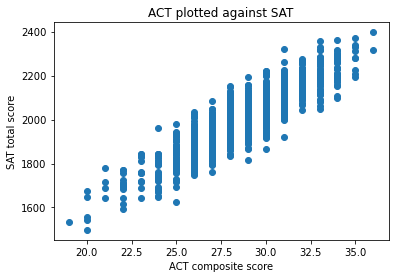

In [5]:
plt.scatter(df['ACT composite score'], df['SAT total score'])
plt.xlabel('ACT composite score')
plt.ylabel('SAT total score')
plt.title('ACT plotted against SAT')
plt.show()

## Question 2
There appears to be a clear positive trend as you progress higher through parental level of education, as the education increases so does the parental income's median value from around 50,000 for some high school to 90,000 for master's degree. The ranges also start to decrease from approximately 60,000 for some high school to 40,000 for master's degrees however the interquartile ranges don't move significantly. The numbers of outliers seem to be fairly consistent throughout the boxplots, however their values correspond differently between each education level, for instance the lower outlier for the masters degree is close to the median value of some high school education. 

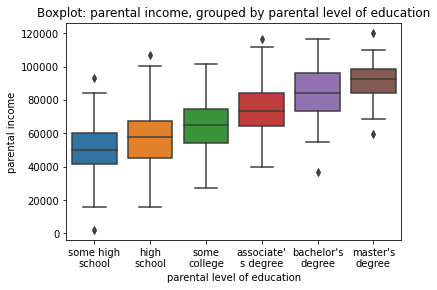

In [6]:
ax = sns.boxplot(x='parental level of education', y='parental income', data=df,order=['some high school','high school'
                                                                                     ,'some college',"associate's degree",
                                                                                     "bachelor's degree","master's degree"])
plt.title('Boxplot: parental income, grouped by parental level of education')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()

In [7]:
df_masters = df[df['parental level of education'] == 'master\'s degree']
display(df_masters.sort_values(by='parental income',ascending=False)[0:1])
display(df_masters.sort_values(by='parental income',ascending=True)[0:1])

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
411,31,2108,master's degree,120391,4.0,3.6,4


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
420,28,2097,master's degree,59724,3.9,3.2,4


## Question 3
It is important to scale different features when comparing distances as if their magnitudes are too different then one feature may take precedence over another. For example, if you were trying to find the distances between individuals based on shoe size and height, both height and shoe_size use different magnitudes or scales. Shoe size ranges from 5 to 10, so a max distance of 5, whilst heights ranges from 153 to 194 with a max distance of 41. In trying to find the distances between these individuals, heights would be weighted more heavily because there is a greater numerical distance between most of the values. By using scaling, we put all of the variables into a similar range to negate this effect. 

In [8]:
heights = np.array([160,180,155,173,153,163,177,175,194,169])
shoe_size = np.array([6,7,8,8,9,10,8,8,6,5])
zipped = np.column_stack((heights,shoe_size))
scaler = StandardScaler()
zipped = scaler.fit_transform(zipped)
zipped

array([[-0.8299425 , -1.04764544],
       [ 0.84670902, -0.34921515],
       [-1.24910538,  0.34921515],
       [ 0.25988098,  0.34921515],
       [-1.41677053,  1.04764544],
       [-0.57844477,  1.74607574],
       [ 0.59521129,  0.34921515],
       [ 0.42754614,  0.34921515],
       [ 2.02036508, -1.04764544],
       [-0.07544932, -1.74607574]])

## Question 4

## Question 5
What this form of interpolation is doing is assigning a numerical value for every combination of x and y. It is then assigning each of these values a colour which is plotted in this first heatmap. By using interpolation='nearest', every value between the z-values is assigned the colour of the z-value that is closest. For example, the point at x=-0.85 and y=-1 is not formally defined in the dataframe but its distance is closest to the z value 1.60. Therefore, it will also take the colour that z=1.60 holds. \
By using 100 x and y values to create the Z matrix from, you are reducing the space between the Z values and therefore increasing the numbers or shades of colours available. Similar to how video resoluton works, there are now more pixels as with our previous example of x=-0.85 and y = -1, the closest z-value would no longer be 1.6 but could be something like 1.84 which would have a more specific rgb value. 
The resulting heatmap axes are also a map of the Z matrix indices. The first map has red lines showing the colour of Z[0,3] which is a value of 1.11. The second heatmap has the same indice of Z[0,3] but because there are far more z-values it now has a value of 1.88.

In [37]:
import numpy as np
x_range = np.linspace(-1, 1, 10)
y_range = np.linspace(-1, 1, 10)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)
# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2
print(Z[0,3])
# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
#display(df)

1.1111111111111112


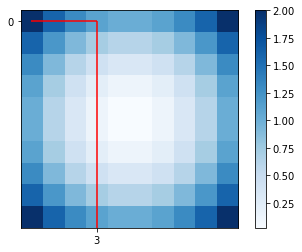

In [24]:
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([3])
plt.yticks([0])
plt.vlines(3,0,9.5,color='r')
plt.hlines(0,0,3,color='r')

plt.show()

In [38]:
x_range = np.linspace(-1, 1, 100)
y_range = np.linspace(-1, 1, 100)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)
# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2
print(Z[0,3])
# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
#display(df)

1.8824609733700643


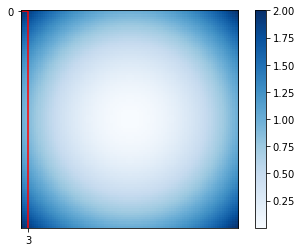

In [35]:
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([3])
plt.yticks([0])
plt.vlines(3,99.5,0,color='r')
plt.hlines(0,0,3,color='r')

plt.show()